# Summary 

For this project on Unsupervised Machine Learning: Clustering, we will make use of 'WholeSale Customer Dataset' which has been sourced from uci. 

This dataset features the clients of wholesale distributor. It contains yearly spending on several product categories in monetary units (m.u.)

Our objective in this project is to cluster this dataset as customer segments based on their yearly spending on the products and group the similar customers together using different clustering technic 


In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

import warnings 
warnings.filterwarnings('ignore', module = 'sklearn')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
os.chdir('data')

In [3]:
data = pd.read_csv ('Wholesale%20customers%20data.csv', sep = ',')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Feature Analysis 


- <b>FRESH</b> : annual spending (m.u.) on fresh products (Continuous)


- <b>MILK</b>: annual spending (m.u.) on milk products (Continuous)


- <b>GROCERY</b>: annual spending (m.u.)on grocery products (Continuous)


- <b>FROZEN</b>: annual spending (m.u.)on frozen products (Continuous)


- <b>DETERGENTS_PAPER</b>: annual spending (m.u.) on detergents and paper products (Continuous)


- <b>DELICATESSEN</b>: annual spending (m.u.)on and delicatessen products (Continuous);


- <b>CHANNEL</b>: customers Channel - Horeca (1: Hotel/Restaurant/Cafe) or Retail channel (Nominal).

In [4]:
data.shape

(440, 8)

In [5]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

As our data only consist of continous except for featue 'Channel' and 'Region'. we will drop those two columns 


In [6]:
data = data.drop(['Channel', 'Region'], axis = 1)

In [7]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [8]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<b>Quick Comments:</b>

As all the attributes above are non-null and have equal nog rows , there seems to be no missing values. All the attributes are of numerical type 

# EDA

lets check for the distribution of our features variables and examine the amount of skewness


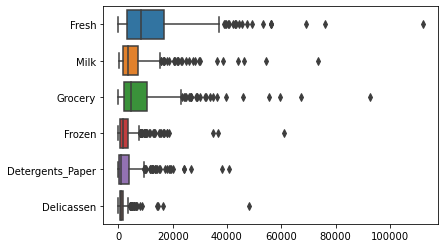

In [9]:
ax = sns.boxplot(data=data, orient="h")

As one can notice we have skew in almost all our features.
Now, we will log transform our skew variables for skew above 0.75

In [10]:
log_columns = data.skew().sort_values(ascending = False)
log_columns = log_columns.loc[log_columns > 0.75]
log_columns

Delicassen         11.15
Frozen              5.91
Milk                4.05
Detergents_Paper    3.63
Grocery             3.59
Fresh               2.56
dtype: float64

In [11]:
for col in log_columns.index:
    data[col] = np.log1p(data[col])

In [12]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.45,9.18,8.93,5.37,7.89,7.20
1,8.86,9.19,9.17,7.47,8.10,7.48
2,8.76,9.08,8.95,7.79,8.17,8.97
3,9.49,7.09,8.35,8.76,6.23,7.49
4,10.03,8.60,8.88,8.27,7.48,8.55
...,...,...,...,...,...,...
435,10.30,9.40,9.68,9.48,5.21,7.70
436,10.58,7.27,6.64,8.41,4.54,7.76
437,9.58,9.65,10.32,6.08,9.61,7.53
438,9.24,7.59,7.71,6.95,5.13,7.66


# Now lets Univariate data visualization of the features and their distribution 

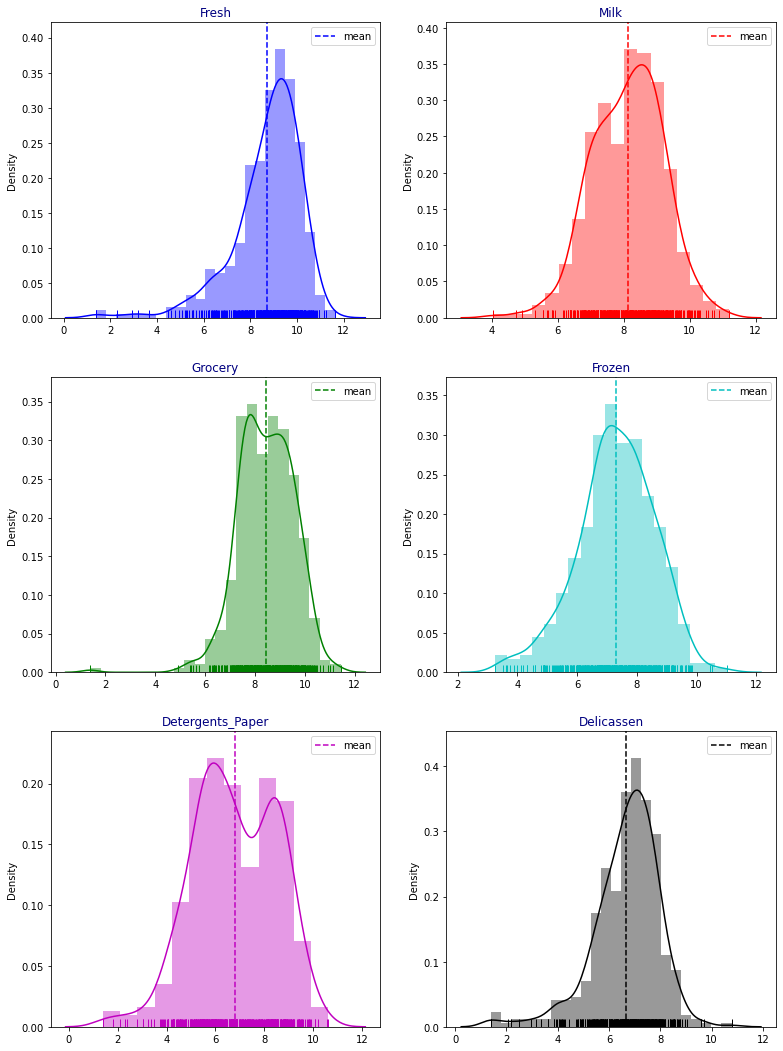

In [14]:

import itertools
warnings.filterwarnings("ignore")
feature_cols = [x for x in data.columns]
length = len(feature_cols)
color = ["b","r","g","c","m","k"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(feature_cols,range(length),color):
    plt.subplot(4,2, j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color=k)
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

As one can notice. Now the distribution are fairly normal after we log transform the skew variables.


# Scaling

Now scaling our data to make sure all the features are on same scale before applying clustering technics 


In [15]:
ss = StandardScaler()

for col in feature_cols:
    data[col] = ss.fit_transform(data[[col]])
data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.49,0.98,0.44,-1.51,0.64,0.41
1,0.09,0.99,0.65,0.13,0.77,0.63
2,0.02,0.89,0.45,0.38,0.80,1.78
3,0.52,-0.96,-0.08,1.14,-0.33,0.63
4,0.88,0.44,0.40,0.76,0.40,1.46
...,...,...,...,...,...,...
435,1.07,1.18,1.12,1.70,-0.93,0.79
436,1.26,-0.79,-1.62,0.87,-1.32,0.84
437,0.58,1.41,1.69,-0.95,1.65,0.67
438,0.34,-0.49,-0.66,-0.28,-0.97,0.77


In [16]:
X_data = data.copy()

# Clustering models

First we will use <b>KMeans</b> model to see how increasing the number of cluster results in low inertia value and there by increasing efficiency.

After that we will use <b>hierarchy</b> clustering to see the clusters and it's thresold. We will visualize it on dendogram.

At last we will use <b>Agglomerative</b> Clustering and see the result on scatter plot using some of our features with Agglomerative Clustering label.


# KMeans

In [17]:
km_list = list()
for clust in range(1,7):
    
    km = KMeans(n_clusters = clust, random_state =42)
    km = km.fit(data[feature_cols])
    km_list.append(pd.Series({'cluster': clust,
                              'inertia': km.inertia_,
                              'model': km}))
km_df = pd.concat(km_list, axis =1).T
km_df

,cluster,inertia,model
0,1,2640.00,"KMeans(n_clusters=1, random_state=42)"
1,2,1844.06,"KMeans(n_clusters=2, random_state=42)"
2,3,1553.39,"KMeans(n_clusters=3, random_state=42)"
3,4,1386.86,"KMeans(n_clusters=4, random_state=42)"
4,5,1266.26,"KMeans(n_clusters=5, random_state=42)"
5,6,1174.76,"KMeans(n_clusters=6, random_state=42)"


<Figure size 720x576 with 0 Axes>

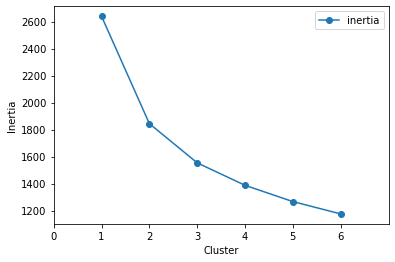

In [18]:
figure = plt.figure(figsize = (10,8))
km_df_plot = km_df[['cluster', 'inertia']].set_index('cluster')
ax = km_df_plot.plot(marker = 'o', ls = '-')

ax.set_xlim(0,7)
ax.set_xticks(range(0,7,1));
ax.set(xlabel = 'Cluster', ylabel= 'Inertia');

As expected, inertia is coming down as we increase the number of cluster for our model.

# Hierarchy Cluster


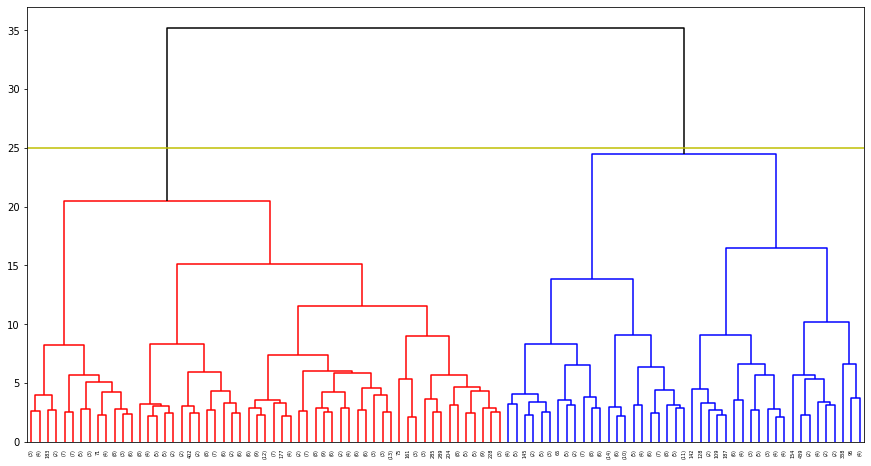

In [19]:
z = hierarchy.linkage(data, method = 'ward')
fig,ax = plt.subplots(figsize = (15,8))

red= color[1]
blue = color[0]
hierarchy.set_link_color_palette ([red, 'blue'])
den = hierarchy.dendrogram(z, orientation = 'top',
                         truncate_mode = 'lastp', p = 100,
                         show_leaf_counts = True, 
                         ax = ax , above_threshold_color = 'black')
ax.axhline (y= 25, color='y', ls = '-');


In this dendrogram, x-axis represents data points and y_axis represent distance between them. We can see the black verticle line is the maximum distance and hence we know that 25 is thresold here, which is represented by yellow horizontal line.

# Agglomerative Clustering 


In [20]:
ag = AgglomerativeClustering(n_clusters = 2,affinity='euclidean', linkage = 'ward',compute_full_tree = True)
ag = ag.fit(data[feature_cols])
y_pred = ag.fit_predict(data[feature_cols])
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

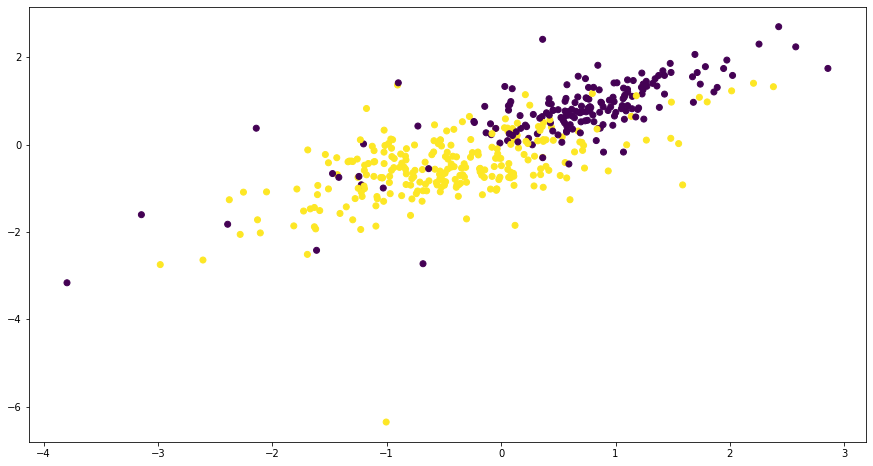

In [21]:
plt.figure(figsize = (15,8))
plt.scatter(data['Milk'], data['Grocery'], c = ag.labels_)

# Results

You can visualize from the above plot that we were able to classifly milk and grocery dataset to two different cluster using Agglomerative Clustering. 
 
Using KMeans, we also came to know that, inertia value decreases as we increase the number of cluster.


# Next Steps

we can use Principal component analysis for more robust results and using gridsearchcv we can tune in the ideal hyper paramters for different clustering technics 
